In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.stattools import grangercausalitytests
import warnings
from sklearn.tree import DecisionTreeRegressor
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams
from sklearn.metrics import mean_squared_error
import warnings
from dateutil.relativedelta import relativedelta
from datetime import datetime
warnings.filterwarnings("ignore")
%matplotlib inline

StatementMeta(devsparkpool, 2201, 3, Finished, Available, Finished)

In [ ]:
df = pd.read_excel('Data.xlsx')
weather = pd.read_csv('Weather.csv')
soil_moist = pd.read_csv('Soil_moisture_2000_mapped.csv')

StatementMeta(devsparkpool, 2201, 7, Finished, Available, Finished)

In [7]:
df

StatementMeta(devsparkpool, 2201, 8, Finished, Available, Finished)

Unnamed: 0  Precipitation 3m avg 9m lag  Fertilizer 3m avg 3m lag  FFB/HA  \
0   2001-01-01                   244.524601                       NaN     NaN   
1   2001-02-01                   198.309089                       NaN     NaN   
2   2001-03-01                   212.574858                       NaN     NaN   
3   2001-04-01                   174.047714                       NaN     NaN   
4   2001-05-01                   196.598540                       NaN     NaN   
..         ...                          ...                       ...     ...   
391        NaT                          NaN                       NaN     NaN   
392        NaT                          NaN                       NaN     NaN   
393        NaT                          NaN                       NaN     NaN   
394        NaT                          NaN                       NaN     NaN   
395        NaT                          NaN                       NaN     NaN   

     ln(Precipitation)  ln(Fertilizer)  ln(FFB)  Precipitation  Fertilizers  
0             5.499316             NaN      NaN     361.945767          NaN  
1             5.289827             NaN      NaN     227.135478          NaN  
2             5.359294             NaN      NaN     286.983593          NaN  
3             5.159329             NaN      NaN     223.638322          NaN  
4             5.281164             NaN      NaN     122.668242          NaN  
..                 ...             ...      ...            ...          ...  
391                NaN             NaN      NaN     230.959025    23.102859  
392                NaN             NaN      NaN     204.387831    15.500011  
393                NaN             NaN      NaN     271.288574    14.747951  
394                NaN             NaN      NaN     300.569418    17.037312  
395                NaN             NaN      NaN     412.617814    17.192316  

[396 rows x 9 columns]

In [8]:
weather

StatementMeta(devsparkpool, 2201, 9, Finished, Available, Finished)

Unnamed: 0  Event_date  Latitude   Longitude Timezone  Elevation  \
0                0  2010-01-02  1.511423  110.380051      GMT       23.0   
1                1  2010-01-03  1.511423  110.380051      GMT       23.0   
2                2  2010-01-04  1.511423  110.380051      GMT       23.0   
3                3  2010-01-05  1.511423  110.380051      GMT       23.0   
4                4  2010-01-06  1.511423  110.380051      GMT       23.0   
...            ...         ...       ...         ...      ...        ...   
125799      125799  2024-07-15  4.323374  113.990189      GMT       17.0   
125800      125800  2024-07-15  5.307557  115.235733      GMT       30.0   
125801      125801  2024-07-15  5.940246  116.025002      GMT        2.0   
125802      125802  2024-07-15  4.323374  118.111198      GMT       15.0   
125803      125803  2024-07-15  5.869947  118.026642      GMT       12.0   

               StationName CountryIso2  Temperature_2m_max  \
0             KUCHING INTL          MY                27.8   
1             KUCHING INTL          MY                29.9   
2             KUCHING INTL          MY                26.9   
3             KUCHING INTL          MY                26.4   
4             KUCHING INTL          MY                28.5   
...                    ...         ...                 ...   
125799                MIRI          MY                29.6   
125800              LABUAN          MY                28.6   
125801  KOTA KINABALU INTL          MY                30.7   
125802               TAWAU          MY                30.0   
125803            SANDAKAN          MY                30.4   

        Temperature_2m_min  ...  Precipitation_hours              Sunrise  \
0                     23.7  ...                  9.0  2010-01-01 22:41:00   
1                     23.3  ...                 22.0  2010-01-02 22:41:00   
2                     23.1  ...                 21.0  2010-01-03 22:42:00   
3                     22.6  ...                 15.0  2010-01-04 22:42:00   
4                     23.3  ...                  0.0  2010-01-05 22:43:00   
...                    ...  ...                  ...                  ...   
125799                24.3  ...                  0.0  2024-07-14 22:19:00   
125800                25.4  ...                  0.0  2024-07-14 22:13:00   
125801                25.9  ...                  0.0  2024-07-14 22:08:00   
125802                24.6  ...                  0.0  2024-07-14 22:03:00   
125803                24.0  ...                  0.0  2024-07-14 22:01:00   

                     Sunset  Sunshine_duration  Daylight_duration  \
0       2010-01-02 10:43:00           9414.530          43327.961   
1       2010-01-03 10:43:00          32963.031          43329.051   
2       2010-01-04 10:44:00           7346.010          43330.219   
3       2010-01-05 10:44:00          11062.200          43331.469   
4       2010-01-06 10:45:00          20210.311          43332.809   
...                     ...                ...                ...   
125799  2024-07-15 10:40:00              0.000          44446.078   
125800  2024-07-15 10:37:00              0.000          44633.391   
125801  2024-07-15 10:34:00           1763.050          44754.199   
125802  2024-07-15 10:23:00           2113.610          44446.078   
125803  2024-07-15 10:26:00              0.000          44740.770   

        Wind_speed_10m_max Wind_gusts_10m_max Shortwave_radiation_sum  \
0                      6.2               20.9                   10.51   
1                      8.0               26.6                   17.09   
2                      7.2               20.2                    7.05   
3                      9.7               22.3                    9.40   
4                      6.2               20.2                   11.59   
...                    ...                ...                     ...   
125799                15.0               32.0                    0.00   
125800      

In [9]:
soil_moist

StatementMeta(devsparkpool, 2201, 10, Finished, Available, Finished)

0  2000-01-01 00:00:00  2000  1  7.0650263   171.25844  GMT  \
0              1  2000-01-01 01:00:00  2000  1   7.065026  171.258440  GMT   
1              2  2000-01-01 02:00:00  2000  1   7.065026  171.258440  GMT   
2              3  2000-01-01 03:00:00  2000  1   7.065026  171.258440  GMT   
3              4  2000-01-01 04:00:00  2000  1   7.065026  171.258440  GMT   
4              5  2000-01-01 05:00:00  2000  1   7.065026  171.258440  GMT   
...          ...                  ...   ... ..        ...         ...  ...   
9278706  9278707  2024-08-12 19:00:00  2024  8   1.652021  103.703415  GMT   
9278707  9278708  2024-08-12 20:00:00  2024  8   1.652021  103.703415  GMT   
9278708  9278709  2024-08-12 21:00:00  2024  8   1.652021  103.703415  GMT   
9278709  9278710  2024-08-12 22:00:00  2024  8   1.652021  103.703415  GMT   
9278710  9278711  2024-08-12 23:00:00  2024  8   1.652021  103.703415  GMT   

          0.0  25391  0.0.1  ...  PMAJ   7.067000  171.266998 2.000  \
0         0.0  25391  0.000  ...  PMAJ      7.067  171.266998   2.0   
1         0.0  25391  0.000  ...  PMAJ      7.067  171.266998   2.0   
2         0.0  25391  0.000  ...  PMAJ      7.067  171.266998   2.0   
3         0.0  25391  0.000  ...  PMAJ      7.067  171.266998   2.0   
4         0.0  25391  0.000  ...  PMAJ      7.067  171.266998   2.0   
...       ...    ...    ...  ...    ...       ...         ...   ...   
9278706  33.0  11325  0.493  ...  WMKJ      1.641  103.669998  41.1   
9278707  33.0  11325  0.493  ...  WMKJ      1.641  103.669998  41.1   
9278708  33.0  11325  0.492  ...  WMKJ      1.641  103.669998  41.1   
9278709  33.0  11325  0.491  ...  WMKJ      1.641  103.669998  41.1   
9278710  33.0  11325  0.490  ...  WMKJ      1.641  103.669998  41.1   

         2006-03-03  2007-07-25  2016-09-19  2024-05-31 10:55:10.532325  \
0        2006-03-03  2007-07-25  2016-09-19  2024-05-31 10:55:10.532325   
1        2006-03-03  2007-07-25  2016-09-19  2024-05-31 10:55:10.532325   
2        2006-03-03  2007-07-25  2016-09-19  2024-05-31 10:55:10.532325   
3        2006-03-03  2007-07-25  2016-09-19  2024-05-31 10:55:10.532325   
4        2006-03-03  2007-07-25  2016-09-19  2024-05-31 10:55:10.532325   
...             ...         ...         ...                         ...   
9278706  1999-01-01  2023-12-28  2016-03-29  2024-05-31 10:55:10.532325   
9278707  1999-01-01  2023-12-28  2016-03-29  2024-05-31 10:55:10.532325   
9278708  1999-01-01  2023-12-28  2016-03-29  2024-05-31 10:55:10.532325   
9278709  1999-01-01  2023-12-28  2016-03-29  2024-05-31 10:55:10.532325   
9278710  1999-01-01  2023-12-28  2016-03-29  2024-05-31 10:55:10.532325   

         BC127735@barrycallebaut.onmicrosoft.com  \
0        BC127735@barrycallebaut.onmicrosoft.com   
1        BC127735@barrycallebaut.onmicrosoft.com   
2        BC127735@barrycallebaut.onmicrosoft.com   
3        BC127735@barrycallebaut.onmicrosoft.com   
4        BC127735@barrycallebaut.onmicrosoft.com   
...                                          ...   
9278706  BC127735@barrycallebaut.onmicrosoft.com   
9278707  BC127735@barrycallebaut.onmicrosoft.com   
9278708  BC127735@barrycallebaut.onmicrosoft.com   
9278709  BC127735@barrycallebaut.onmicrosoft.com   
9278710  BC127735@barrycallebaut.onmicrosoft.com   

         ntbk_goldLayer_load_tbl_dim_meteo_station  
0        ntbk_goldLayer_load_tbl_dim_meteo_station  
1        ntbk_goldLayer_load_tbl_dim_meteo_station  
2        ntbk_goldLayer_load_tbl_dim_meteo_station  
3        ntbk_goldLayer_load_tbl_dim_meteo_station  
4        ntbk_goldLayer_load_tbl_dim_meteo_station  
...                                            ...  
9278706  ntbk_goldLayer_load_tbl_dim_meteo_station  
9278707  ntbk_goldLayer_load_tbl_dim_meteo_station  
9278708  ntbk_goldLayer_load_tbl_dim_meteo_station  
9278709  ntbk_goldLayer_load_tbl_dim_meteo_station  
9278710  ntbk_goldLayer_load_tbl_dim_meteo_station  

[9278711 rows x 31 columns]

## Data Preprocessing

In [10]:
# Change 1st column name to Date
df.columns.values[0] = 'Date'

# Reset indexes
df.reset_index(inplace=True)

# Set the 'Date' column as the index
df.set_index('Date', inplace=True)

# Drop column with indexes
df = df.drop(['index'], axis = 1)

# Rename column
df.rename(columns={'Unnamed: 1':'Precipitation'})

# Drop rows where in column 'FFB/HA' there are empty values
df = df.dropna(subset=['FFB/HA'])

df

StatementMeta(devsparkpool, 2201, 11, Finished, Available, Finished)

Precipitation 3m avg 9m lag  Fertilizer 3m avg 3m lag  FFB/HA  \
Date                                                                        
2013-01-01                   218.796164                 17.231124    1.63   
2013-02-01                   230.504859                 15.092079    1.32   
2013-03-01                   204.243517                 11.516597    1.30   
2013-04-01                   193.328925                 12.718711    1.33   
2013-05-01                   186.234917                 14.520619    1.35   
...                                 ...                       ...     ...   
2024-02-01                   181.561599                 23.679685    1.08   
2024-03-01                   145.385226                 23.758299    1.17   
2024-04-01                   189.367583                 22.995408    1.27   
2024-05-01                   186.674760                 21.973213    1.43   
2024-06-01                   242.717884                 21.746646    1.40   

            ln(Precipitation)  ln(Fertilizer)   ln(FFB)  Precipitation  \
Date                                                                     
2013-01-01           5.388141        2.846717  0.488580     246.032443   
2013-02-01           5.440272        2.714170  0.277632     295.686480   
2013-03-01           5.319313        2.443789  0.262364     106.344932   
2013-04-01           5.264393        2.543074  0.285179     185.559277   
2013-05-01           5.227009        2.675570  0.300105     180.676127   
...                       ...             ...       ...            ...   
2024-02-01           5.201595        3.164618  0.076961     136.245812   
2024-03-01           4.979387        3.167932  0.157004     103.772335   
2024-04-01           5.243690        3.135295  0.239017     167.908393   
2024-05-01           5.229368        3.089824  0.357674     254.004657   
2024-06-01           5.491900        3.079460  0.336472     274.132675   

            Fertilizers  
Date                     
2013-01-01    21.313371  
2013-02-01    16.780116  
2013-03-01    25.100980  
2013-04-01    35.597868  
2013-05-01    24.032268  
...                 ...  
2024-02-01    18.168556  
2024-03-01    21.679521  
2024-04-01    19.659894  
2024-05-01    27.467429  
2024-06-01    25.311974  

[138 rows x 8 columns]

In [11]:
weather.columns

StatementMeta(devsparkpool, 2201, 12, Finished, Available, Finished)

Index(['Unnamed: 0', 'Event_date', 'Latitude', 'Longitude', 'Timezone',
       'Elevation', 'StationName', 'CountryIso2', 'Temperature_2m_max',
       'Temperature_2m_min', 'Apparent_temperature_max',
       'Apparent_temperature_min', 'Precipitation_sum', 'Rain_sum',
       'Snowfall_sum', 'Precipitation_hours', 'Sunrise', 'Sunset',
       'Sunshine_duration', 'Daylight_duration', 'Wind_speed_10m_max',
       'Wind_gusts_10m_max', 'Shortwave_radiation_sum',
       'Et0_fao_evapotranspiration', 'CreatedDate'],
      dtype='object')

In [12]:
# Delete column with indexes
weather = weather.drop(['Unnamed: 0'], axis = 1)

# Set the 'Event_date' column as the index
weather.set_index('Event_date', inplace=True)

weather

StatementMeta(devsparkpool, 2201, 13, Finished, Available, Finished)

Latitude   Longitude Timezone  Elevation         StationName  \
Event_date                                                                 
2010-01-02  1.511423  110.380051      GMT       23.0        KUCHING INTL   
2010-01-03  1.511423  110.380051      GMT       23.0        KUCHING INTL   
2010-01-04  1.511423  110.380051      GMT       23.0        KUCHING INTL   
2010-01-05  1.511423  110.380051      GMT       23.0        KUCHING INTL   
2010-01-06  1.511423  110.380051      GMT       23.0        KUCHING INTL   
...              ...         ...      ...        ...                 ...   
2024-07-15  4.323374  113.990189      GMT       17.0                MIRI   
2024-07-15  5.307557  115.235733      GMT       30.0              LABUAN   
2024-07-15  5.940246  116.025002      GMT        2.0  KOTA KINABALU INTL   
2024-07-15  4.323374  118.111198      GMT       15.0               TAWAU   
2024-07-15  5.869947  118.026642      GMT       12.0            SANDAKAN   

           CountryIso2  Temperature_2m_max  Temperature_2m_min  \
Event_date                                                       
2010-01-02          MY                27.8                23.7   
2010-01-03          MY                29.9                23.3   
2010-01-04          MY                26.9                23.1   
2010-01-05          MY                26.4                22.6   
2010-01-06          MY                28.5                23.3   
...                ...                 ...                 ...   
2024-07-15          MY                29.6                24.3   
2024-07-15          MY                28.6                25.4   
2024-07-15          MY                30.7                25.9   
2024-07-15          MY                30.0                24.6   
2024-07-15          MY                30.4                24.0   

            Apparent_temperature_max  Apparent_temperature_min  ...  \
Event_date                                                      ...   
2010-01-02                      34.1                      28.7  ...   
2010-01-03                      37.2                      28.3  ...   
2010-01-04                      33.0                      28.2  ...   
2010-01-05                      32.9                      27.4  ...   
2010-01-06                      33.6                      28.4  ...   
...                              ...                       ...  ...   
2024-07-15                      35.4                      27.8  ...   
2024-07-15                      33.8                      28.8  ...   
2024-07-15                      34.8                      29.6  ...   
2024-07-15                      35.2                      29.7  ...   
2024-07-15                      36.6                      29.0  ...   

            Precipitation_hours              Sunrise               Sunset  \
Event_date                                                                  
2010-01-02                  9.0  2010-01-01 22:41:00  2010-01-02 10:43:00   
2010-01-03                 22.0  2010-01-02 22:41:00  2010-01-03 10:43:00   
2010-01-04                 21.0  2010-01-03 22:42:00  2010-01-04 10:44:00   
2010-01-05                 15.0  2010-01-04 22:42:00  2010-01-05 10:44:00   
2010-01-06                  0.0  2010-01-05 22:43:00  2010-01-06 10:45:00   
...                         ...                  ...                  ...   
2024-07-15                  0.0  2024-07-14 22:19:00  2024-07-15 10:40:00   
2024-07-15                  0.0  2024-07-14 22:13:00  2024-07-15 10:37:00   
2024-07-15                  0.0  2024-07-14 22:08:00  2024-07-15 10:34:00   
2024-07-15                  0.0  2024-07-14 22:03:00  2024-07-15 10:23:00   
2024-07-15                  0.0  2024-07-14 22:01:00  2024-07-15 10:26:00   

            Sunshine_duration Daylight_duration Wind_speed_10m_max  \
Event_date                                                           
2010-01-02           9414.530         43327.961                6.2   
2010-01-03          32963.03

##### Checking the correlation for weather data

In [13]:
# List of temperature columns to check correlations with precipitation
temperature_columns = ['Temperature_2m_max', 'Temperature_2m_min','Apparent_temperature_max', 'Apparent_temperature_min']

# Function to calculate correlations for each temperature type with precipitation
def calculate_correlations(group):
    correlations = {}
    for temp_col in temperature_columns:
        correlations[temp_col] = group[temp_col].corr(group['Precipitation_sum'])
    return pd.Series(correlations)

# Group by 'station' and apply the correlation calculation function
correlation_df = weather.groupby('StationName').apply(calculate_correlations).reset_index()

# Set the 'StationName' column as the index
correlation_df.set_index('StationName', inplace=True)

correlation_df

StatementMeta(devsparkpool, 2201, 14, Finished, Available, Finished)

Temperature_2m_max  Temperature_2m_min  \
StationName                                                     
BINTULU                         -0.356558           -0.353861   
KOTA KINABALU INTL              -0.379267           -0.042072   
KUANTAN                         -0.304206           -0.084871   
KUCHING INTL                    -0.372952           -0.162072   
LABUAN                          -0.218659           -0.492510   
MALACCA                         -0.276482           -0.194314   
MERSING                         -0.431742           -0.354376   
MIRI                            -0.398922           -0.473637   
SANDAKAN                        -0.364742           -0.410132   
SIBU                            -0.358331           -0.233458   
SINGAPORE CHANGI INTL           -0.339871           -0.392836   
SULTAN ISMAIL                   -0.374703           -0.189357   
TAWAU                           -0.327644           -0.374184   

                       Apparent_temperature_max  Apparent_temperature_min  
StationName                                                                
BINTULU                               -0.230706                 -0.326358  
KOTA KINABALU INTL                    -0.345810                 -0.164323  
KUANTAN                               -0.110202                 -0.053545  
KUCHING INTL                          -0.250218                 -0.139477  
LABUAN                                -0.189251                 -0.429025  
MALACCA                               -0.101985                  0.004644  
MERSING                               -0.261186                 -0.280621  
MIRI                                  -0.310908                 -0.433187  
SANDAKAN                              -0.262563                 -0.299858  
SIBU                                  -0.223082                 -0.193076  
SINGAPORE CHANGI INTL                 -0.208837                 -0.269614  
SULTAN ISMAIL                         -0.119961                 -0.095487  
TAWAU                                 -0.195540                 -0.235911

##### Code for having 30 days in each month as an average

In [14]:
'''
#Change the format of the index column to datetime
df.index = pd.to_datetime(df.index)

#Create column with number of days in each month (it takes into consderation the leap year for Feb)
df['Days_in_Month'] = df.index.to_series().dt.days_in_month

#Divide volumes of milk by number of days in month and multiply by 30 
# to have equal number of days in each column
df['US Milk Production'] = df['US Milk Production'] / df['Days_in_Month']
df['US Milk Production'] = df['US Milk Production']*30

df['Milk Per Cow'] = df['Milk Per Cow'] / df['Days_in_Month']
df['Milk Per Cow'] = df['Milk Per Cow']*30

#Drop column with days in month
df.drop('Days_in_Month', axis=1, inplace=True)
df
'''

StatementMeta(devsparkpool, 2201, 15, Finished, Available, Finished)

"\n#Change the format of the index column to datetime\ndf.index = pd.to_datetime(df.index)\n\n#Create column with number of days in each month (it takes into consderation the leap year for Feb)\ndf['Days_in_Month'] = df.index.to_series().dt.days_in_month\n\n#Divide volumes of milk by number of days in month and multiply by 30 \n# to have equal number of days in each column\ndf['US Milk Production'] = df['US Milk Production'] / df['Days_in_Month']\ndf['US Milk Production'] = df['US Milk Production']*30\n\ndf['Milk Per Cow'] = df['Milk Per Cow'] / df['Days_in_Month']\ndf['Milk Per Cow'] = df['Milk Per Cow']*30\n\n#Drop column with days in month\ndf.drop('Days_in_Month', axis=1, inplace=True)\ndf\n"

##### Statistical decription of the data

In [15]:
df.describe(include='all')

StatementMeta(devsparkpool, 2201, 16, Finished, Available, Finished)

Precipitation 3m avg 9m lag  Fertilizer 3m avg 3m lag      FFB/HA  \
count                   138.000000                138.000000  138.000000   
mean                    233.770559                 21.101935    1.415725   
std                      72.041237                  6.790360    0.220102   
min                      63.495343                  7.569980    0.970000   
25%                     186.344877                 16.664346    1.262500   
50%                     217.757551                 20.497217    1.405000   
75%                     285.198308                 25.726739    1.570000   
max                     421.813990                 42.820211    1.940000   

       ln(Precipitation)  ln(Fertilizer)     ln(FFB)  Precipitation  \
count         138.000000      138.000000  138.000000     138.000000   
mean            5.403913        2.995180    0.335473     234.630389   
std             0.329879        0.338778    0.157456     100.072814   
min             4.150967        2.024190   -0.030459      16.977572   
25%             5.227599        2.813271    0.233088     167.982583   
50%             5.383371        3.020288    0.340031     227.944363   
75%             5.653171        3.247523    0.451076     288.010970   
max             6.044564        3.757010    0.662688     658.858643   

       Fertilizers  
count   138.000000  
mean     21.403903  
std       8.684882  
min       3.704209  
25%      14.529363  
50%      21.327781  
75%      27.413391  
max      45.560696

##### Checking the variances

In [16]:
df.var()

StatementMeta(devsparkpool, 2201, 17, Finished, Available, Finished)

Precipitation 3m avg 9m lag     5189.939837
Fertilizer 3m avg 3m lag          46.108989
FFB/HA                             0.048445
ln(Precipitation)                  0.108820
ln(Fertilizer)                     0.114770
ln(FFB)                            0.024792
Precipitation                  10014.568037
Fertilizers                       75.427183
dtype: float64

##### Histogram of each column

StatementMeta(devsparkpool, 2201, 18, Finished, Available, Finished)

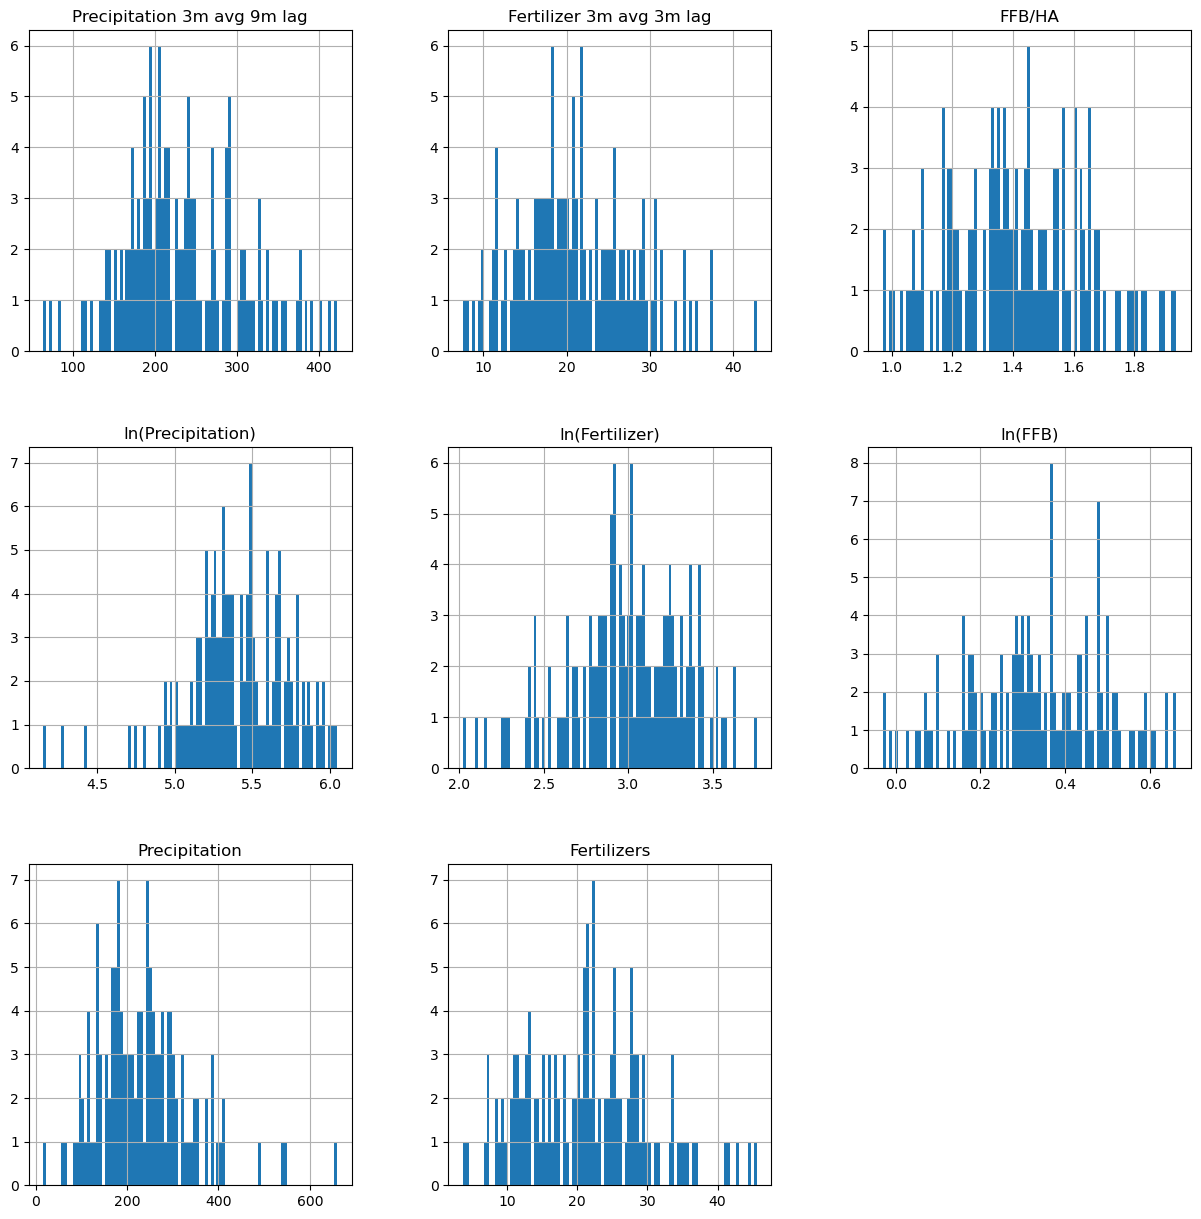

In [17]:
df.hist(bins = 100, figsize = (15,15))
plt.show()

In [18]:
df.columns

StatementMeta(devsparkpool, 2201, 19, Finished, Available, Finished)

Index(['Precipitation 3m avg 9m lag', 'Fertilizer 3m avg 3m lag', 'FFB/HA',
       'ln(Precipitation)', 'ln(Fertilizer)', 'ln(FFB)', 'Precipitation',
       'Fertilizers'],
      dtype='object')

StatementMeta(devsparkpool, 2201, 20, Finished, Available, Finished)

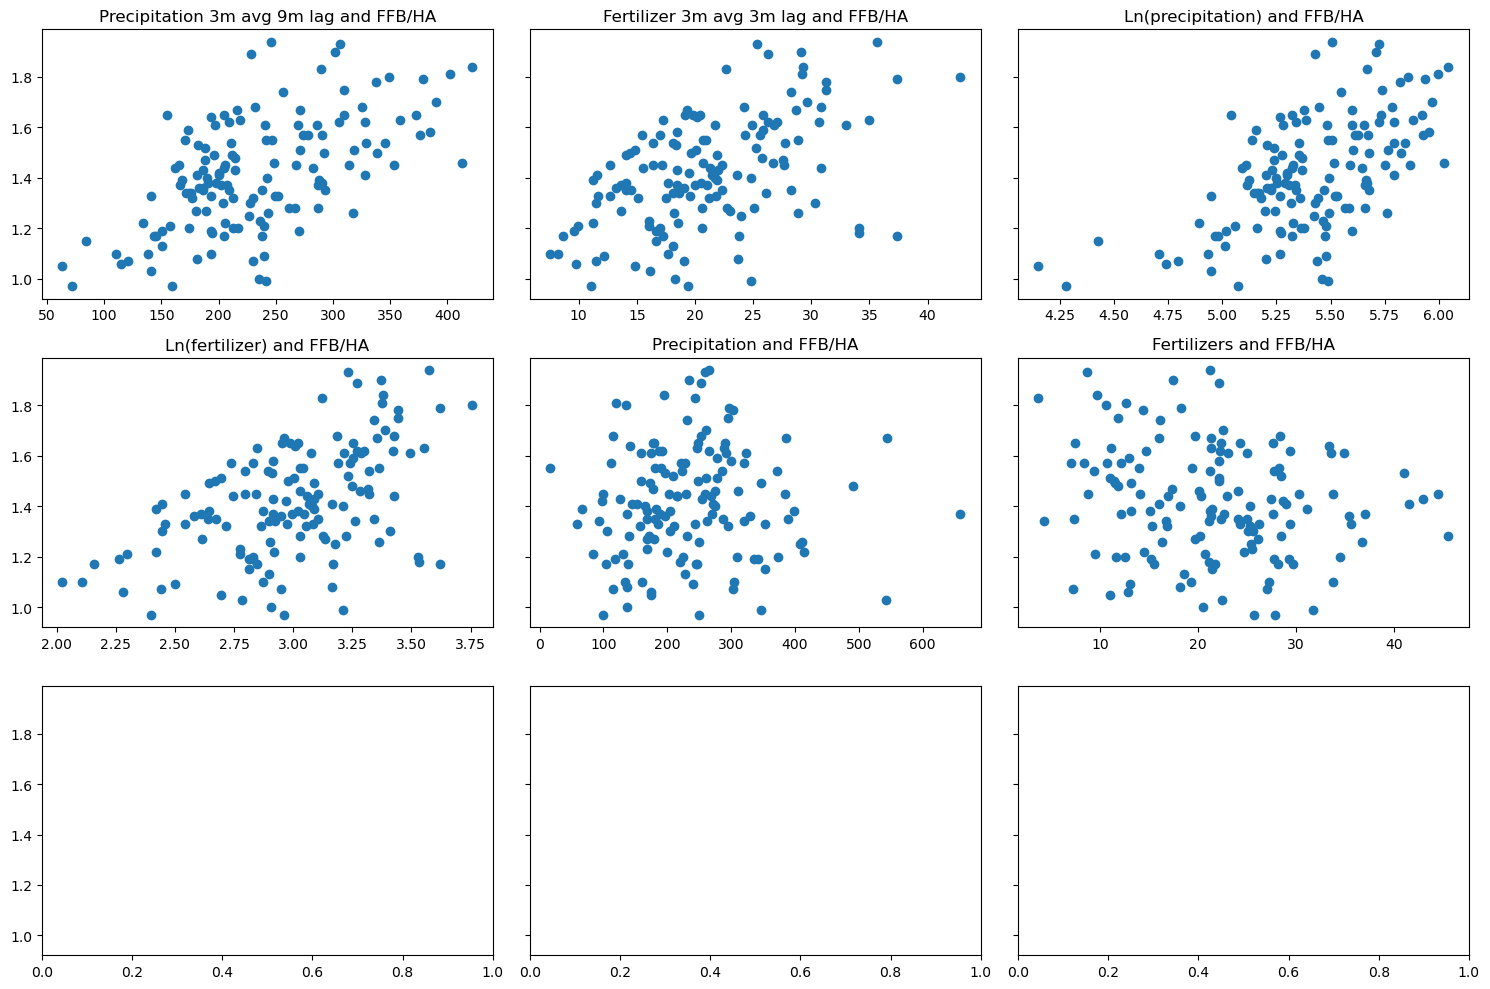

In [19]:
col_to_plot = ['Precipitation 3m avg 9m lag', 'Fertilizer 3m avg 3m lag', 'ln(Precipitation)', 'ln(Fertilizer)', 'Precipitation','Fertilizers']
fig, axes = plt.subplots(3, 3, figsize=(15, 10), sharey=True)
axes = axes.flatten()

for i, column in enumerate(col_to_plot):
    axes[i].scatter(df[column], df['FFB/HA'])
    axes[i].set_title(f'{column.capitalize()} and FFB/HA')

plt.tight_layout()
plt.show()

##### Line time series chart for each column

In [20]:
'''
fig, axes = plt.subplots(nrows=3, ncols=3, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = df[df.columns[i]]
    ax.plot(data, linewidth=1)
    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();
'''

StatementMeta(devsparkpool, 2201, 21, Finished, Available, Finished)

'\nfig, axes = plt.subplots(nrows=3, ncols=3, dpi=120, figsize=(10,6))\nfor i, ax in enumerate(axes.flatten()):\n    data = df[df.columns[i]]\n    ax.plot(data, linewidth=1)\n    ax.set_title(df.columns[i])\n    ax.xaxis.set_ticks_position(\'none\')\n    ax.yaxis.set_ticks_position(\'none\')\n    ax.spines["top"].set_alpha(0)\n    ax.tick_params(labelsize=6)\n\nplt.tight_layout();\n'

##### Oils Production Decomposition

StatementMeta(devsparkpool, 2201, 22, Finished, Available, Finished)

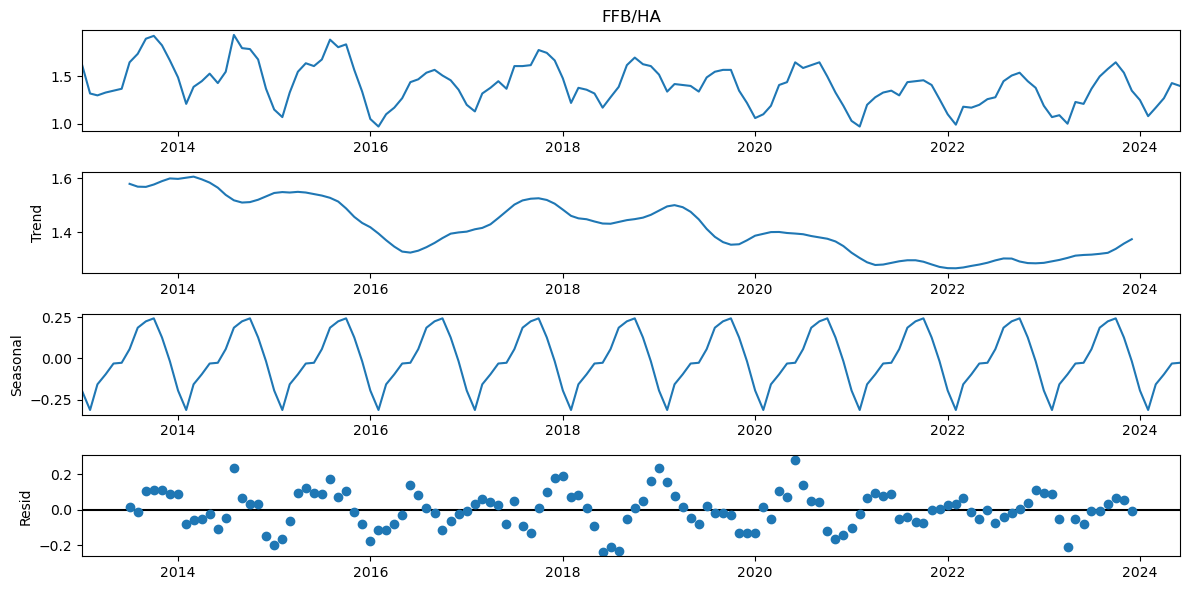

In [21]:
etsdecompos = seasonal_decompose(df['FFB/HA'])
rcParams['figure.figsize']=(12,6)
etsdecompos.plot();

# Stationarity and Differencing

##### Check stationary for each time series. We are using ADF test.

In [22]:
for variable in df.columns:

    # Perform the ADF test
    result = adfuller(df[variable])

    # Extract and print the p-value from the test result
    p_value = result[1]
    print("p-value:", p_value)

    # Interpret the result
    if p_value <= 0.05:
        print(f"The variable {variable} is stationary.\n")
    else:
        print(f"The variable {variable} is not stationary.\n")

StatementMeta(devsparkpool, 2201, 23, Finished, Available, Finished)

p-value: 0.3055124496364613
The variable Precipitation 3m avg 9m lag is not stationary.

p-value: 0.0007736977838955938
The variable Fertilizer 3m avg 3m lag is stationary.

p-value: 0.2113075131759305
The variable FFB/HA is not stationary.

p-value: 0.34628926453051373
The variable ln(Precipitation) is not stationary.

p-value: 0.00028831276135851366
The variable ln(Fertilizer) is stationary.

p-value: 0.19376023066729225
The variable ln(FFB) is not stationary.

p-value: 0.391150772136465
The variable Precipitation is not stationary.

p-value: 3.805823538565674e-10
The variable Fertilizers is stationary.



From above results we see that columns with Ratio of Milk Price/Feed Cost and US Average Kill Cow Price are stationary, the rest is not. Let's difference columns again.

##### Apply 1st differencing

In [23]:
df_diff1 = df.diff(periods=1).dropna()

StatementMeta(devsparkpool, 2201, 24, Finished, Available, Finished)

##### Check stationary once again after differencing

In [24]:
for variable in df_diff1.columns:

    # Perform the ADF test
    result = adfuller(df_diff1[variable])

    # Extract and print the p-value from the test result
    p_value = result[1]
    print("p-value:", p_value)

    # Interpret the result
    if p_value <= 0.05:
        print(f"The variable {variable} is stationary.\n")
    else:
        print(f"The variable {variable} is not stationary.\n")

StatementMeta(devsparkpool, 2201, 25, Finished, Available, Finished)

p-value: 0.0013646805414815578
The variable Precipitation 3m avg 9m lag is stationary.

p-value: 1.4832481016058949e-09
The variable Fertilizer 3m avg 3m lag is stationary.

p-value: 0.0007037656487692383
The variable FFB/HA is stationary.

p-value: 1.7236085554355169e-16
The variable ln(Precipitation) is stationary.

p-value: 3.31618387335602e-13
The variable ln(Fertilizer) is stationary.

p-value: 0.00015594331168414913
The variable ln(FFB) is stationary.

p-value: 1.2975369955500166e-18
The variable Precipitation is stationary.

p-value: 3.494255061733452e-08
The variable Fertilizers is stationary.



##### After one differencing all columns are stationary.

# Granger's test

In [25]:
'''
max_lag = 12
columns = df.columns
p_value_df = pd.DataFrame(columns=columns, index=columns)

# Suppress the FutureWarning
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)

    # Iterate through pairs of columns
    for col_x in df.columns:
        for col_y in df.columns:
            if col_x != col_y:
                
                # Perform Granger's test for the current pair of columns
                results = grangercausalitytests(df[[col_x, col_y]], max_lag, verbose=False)
                
                # Extract and store the p-value in the p_value_df
                p_value = results[max_lag][0]['ssr_ftest'][1]
                p_value_df.at[col_x, col_y] = p_value
                '''

StatementMeta(devsparkpool, 2201, 26, Finished, Available, Finished)

'\nmax_lag = 12\ncolumns = df.columns\np_value_df = pd.DataFrame(columns=columns, index=columns)\n\n# Suppress the FutureWarning\nwith warnings.catch_warnings():\n    warnings.simplefilter("ignore", category=FutureWarning)\n\n    # Iterate through pairs of columns\n    for col_x in df.columns:\n        for col_y in df.columns:\n            if col_x != col_y:\n                \n                # Perform Granger\'s test for the current pair of columns\n                results = grangercausalitytests(df[[col_x, col_y]], max_lag, verbose=False)\n                \n                # Extract and store the p-value in the p_value_df\n                p_value = results[max_lag][0][\'ssr_ftest\'][1]\n                p_value_df.at[col_x, col_y] = p_value\n                '

The column labels represent the potential cause or predictor variable (X-axis).
The row index labels represent the potential effect or dependent variable (Y-axis).

Granger's test involves running multiple regressions to compare two models:
* Model 1: A univariate autoregressive model for Y that only uses past values of Y (i.e., $Y[t-1], Y[t-2], ..., Y[t-k]$).
* Model 2: A bivariate autoregressive model for Y that includes past values of both Y and X (i.e., $Y[t-1], Y[t-2], ..., Y[t-k], X[t-1], X[t-2], ..., X[t-k]$).

Each cell in the table contains a p-value, which measures the significance of Granger causality between the corresponding X and Y variables.
A low p-value (typically less than 0.05) suggests that there is evidence of Granger causality between the X and Y variables.
Conversely, a high p-value (greater than 0.05) suggests that there is not enough evidence to conclude Granger causality.

In [26]:
#p_value_df

StatementMeta(devsparkpool, 2201, 27, Finished, Available, Finished)

# Correlations

##### Heatmap of correlations

StatementMeta(devsparkpool, 2201, 28, Finished, Available, Finished)

<AxesSubplot: >

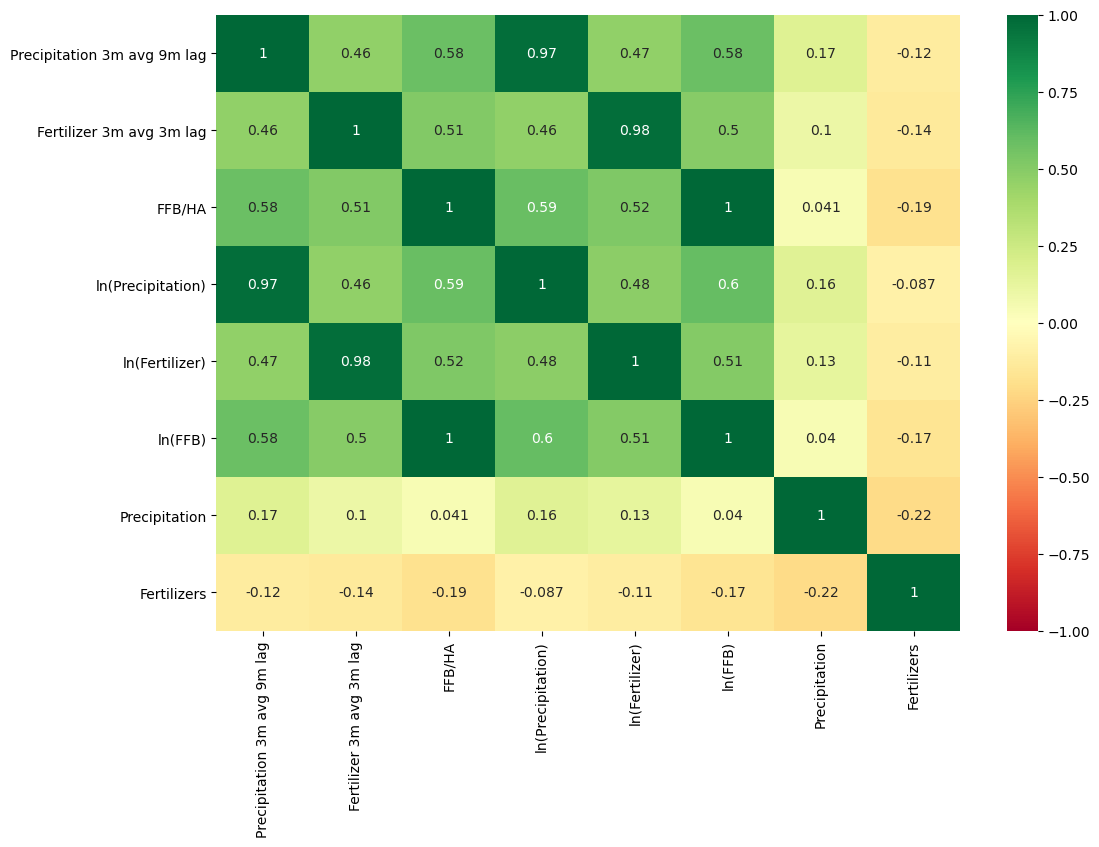

In [27]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True, cmap = "RdYlGn", vmin=-1, vmax=1)

##### Create dataframe with lagged columns

In [28]:
df_lag = df.copy()

for window in range(1, 13): #lag of range 1 to 12+1
    shifted = df.shift(window)
    shifted.columns = ["L"+str(window)+" "+x for x in df.columns] #rename the lagged columns
    df_lag = pd.concat((df_lag,shifted),axis=1)

df_lag.head()

StatementMeta(devsparkpool, 2201, 29, Finished, Available, Finished)

Precipitation 3m avg 9m lag  Fertilizer 3m avg 3m lag  FFB/HA  \
Date                                                                        
2013-01-01                   218.796164                 17.231124    1.63   
2013-02-01                   230.504859                 15.092079    1.32   
2013-03-01                   204.243517                 11.516597    1.30   
2013-04-01                   193.328925                 12.718711    1.33   
2013-05-01                   186.234917                 14.520619    1.35   

            ln(Precipitation)  ln(Fertilizer)   ln(FFB)  Precipitation  \
Date                                                                     
2013-01-01           5.388141        2.846717  0.488580     246.032443   
2013-02-01           5.440272        2.714170  0.277632     295.686480   
2013-03-01           5.319313        2.443789  0.262364     106.344932   
2013-04-01           5.264393        2.543074  0.285179     185.559277   
2013-05-01           5.227009        2.675570  0.300105     180.676127   

            Fertilizers  L1 Precipitation 3m avg 9m lag  \
Date                                                      
2013-01-01    21.313371                             NaN   
2013-02-01    16.780116                      218.796164   
2013-03-01    25.100980                      230.504859   
2013-04-01    35.597868                      204.243517   
2013-05-01    24.032268                      193.328925   

            L1 Fertilizer 3m avg 3m lag  ...  L11 Precipitation  \
Date                                     ...                      
2013-01-01                          NaN  ...                NaN   
2013-02-01                    17.231124  ...                NaN   
2013-03-01                    15.092079  ...                NaN   
2013-04-01                    11.516597  ...                NaN   
2013-05-01                    12.718711  ...                NaN   

            L11 Fertilizers  L12 Precipitation 3m avg 9m lag  \
Date                                                           
2013-01-01              NaN                              NaN   
2013-02-01              NaN                              NaN   
2013-03-01              NaN                              NaN   
2013-04-01              NaN                              NaN   
2013-05-01              NaN                              NaN   

            L12 Fertilizer 3m avg 3m lag  L12 FFB/HA  L12 ln(Precipitation)  \
Date                                                                          
2013-01-01                           NaN         NaN                    NaN   
2013-02-01                           NaN         NaN                    NaN   
2013-03-01                           NaN         NaN                    NaN   
2013-04-01                           NaN         NaN                    NaN   
2013-05-01                           NaN         NaN                    NaN   

            L12 ln(Fertilizer)  L12 ln(FFB)  L12 Precipitation  \
Date                                                             
2013-01-01                 NaN          NaN                NaN   
2013-02-01                 NaN          NaN                NaN   
2013-03-01                 NaN          NaN                NaN   
2013-04-01                 NaN          NaN                NaN   
2013-05-01                 NaN          NaN                NaN   

            L12 Fertilizers  
Date                         
2013-01-01              NaN  
2013-02-01              NaN  
2013-03-01              NaN  
2013-04-01              NaN  
2013-05-01              NaN  

[5 rows x 104 columns]

In [29]:
df_lag.columns

StatementMeta(devsparkpool, 2201, 30, Finished, Available, Finished)

Index(['Precipitation 3m avg 9m lag', 'Fertilizer 3m avg 3m lag', 'FFB/HA',
       'ln(Precipitation)', 'ln(Fertilizer)', 'ln(FFB)', 'Precipitation',
       'Fertilizers', 'L1 Precipitation 3m avg 9m lag',
       'L1 Fertilizer 3m avg 3m lag',
       ...
       'L11 Precipitation', 'L11 Fertilizers',
       'L12 Precipitation 3m avg 9m lag', 'L12 Fertilizer 3m avg 3m lag',
       'L12 FFB/HA', 'L12 ln(Precipitation)', 'L12 ln(Fertilizer)',
       'L12 ln(FFB)', 'L12 Precipitation', 'L12 Fertilizers'],
      dtype='object', length=104)

# Lags Correlations

##### FFB/HA & Precipitation

StatementMeta(devsparkpool, 2201, 31, Finished, Available, Finished)

<AxesSubplot: >

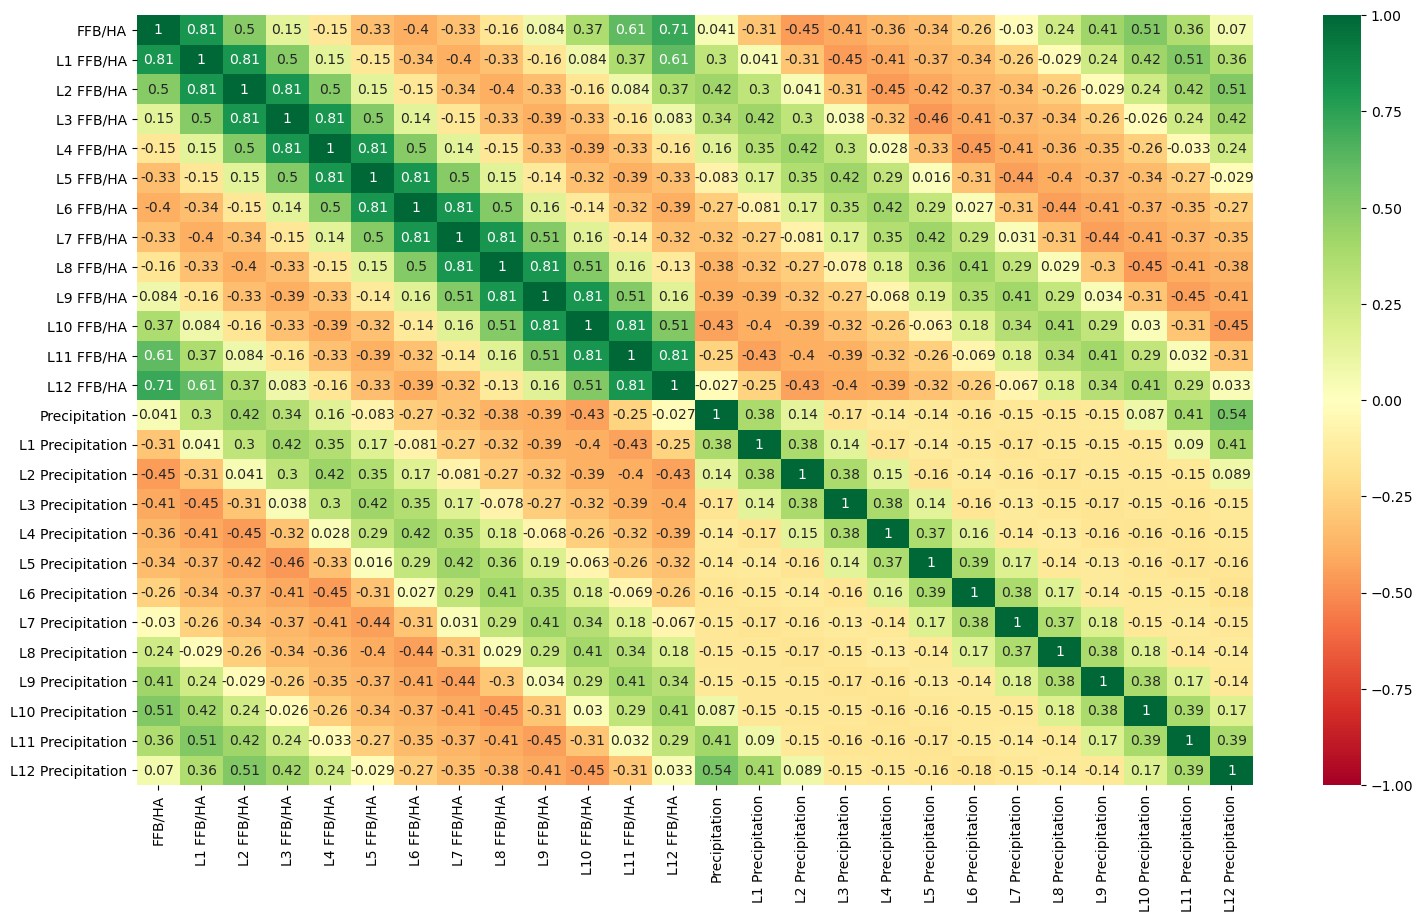

In [30]:
df_lag_1 = df_lag[[
    'FFB/HA', 'L1 FFB/HA', 'L2 FFB/HA', 'L3 FFB/HA', 'L4 FFB/HA', 'L5 FFB/HA', 'L6 FFB/HA', 'L7 FFB/HA', 'L8 FFB/HA', 'L9 FFB/HA', 'L10 FFB/HA', 'L11 FFB/HA', 'L12 FFB/HA',
    'Precipitation', 'L1 Precipitation', 'L2 Precipitation', 'L3 Precipitation', 'L4 Precipitation', 'L5 Precipitation', 'L6 Precipitation', 'L7 Precipitation', 'L8 Precipitation', 'L9 Precipitation', 'L10 Precipitation', 'L11 Precipitation', 'L12 Precipitation'
]]
plt.figure(figsize=(18,10))
sns.heatmap(df_lag_1.corr(), annot=True, cmap = "RdYlGn", vmin=-1, vmax=1)

##### Milk Production & Dairy Cows

StatementMeta(devsparkpool, 2201, 32, Finished, Available, Finished)

<AxesSubplot: >

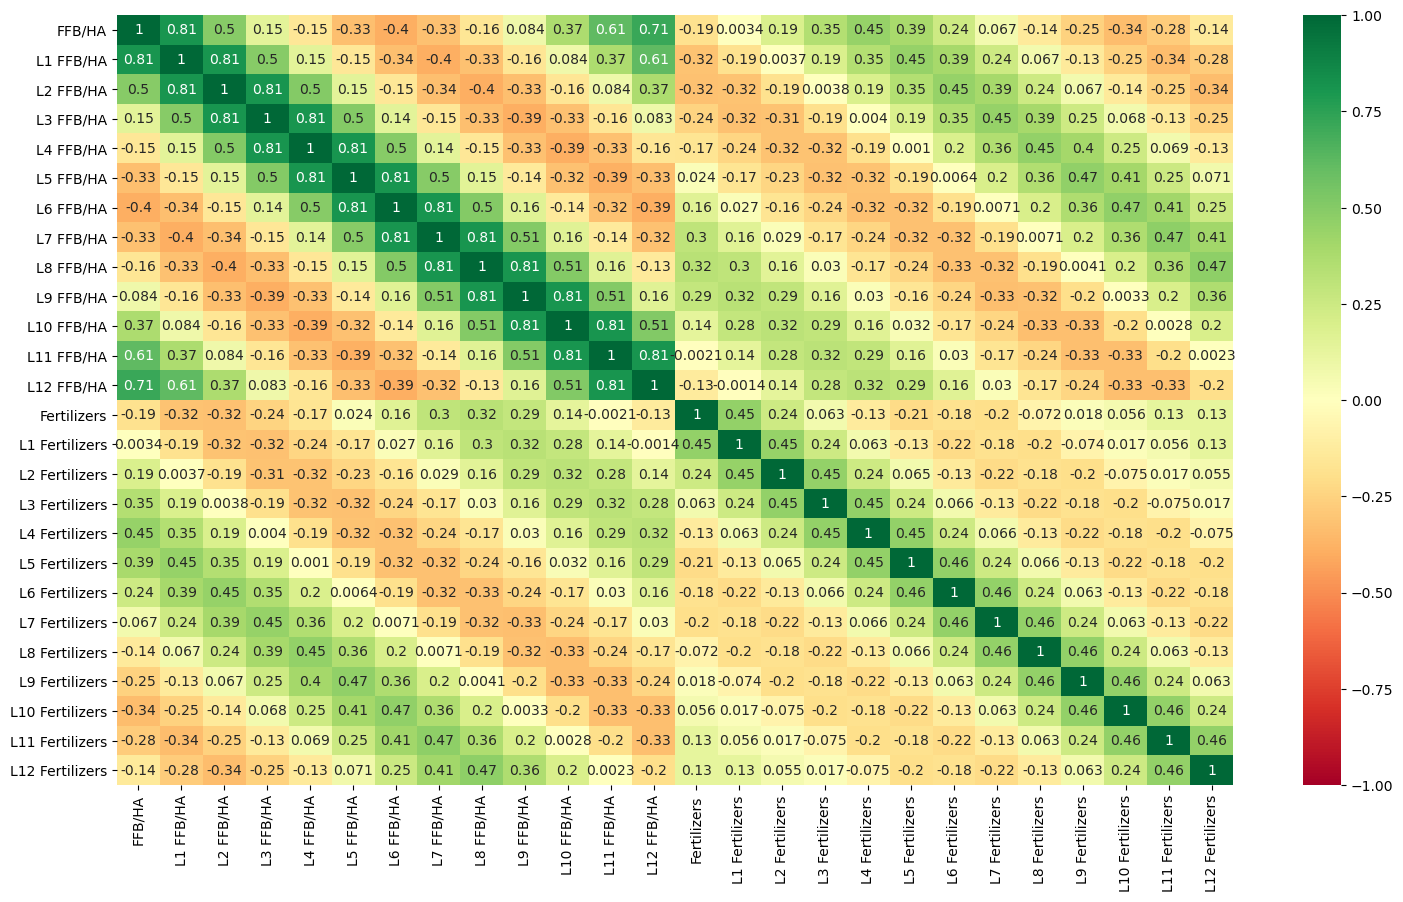

In [31]:
df_lag_2 = df_lag[[
    'FFB/HA', 'L1 FFB/HA', 'L2 FFB/HA', 'L3 FFB/HA', 'L4 FFB/HA', 'L5 FFB/HA', 'L6 FFB/HA', 'L7 FFB/HA', 'L8 FFB/HA', 'L9 FFB/HA', 'L10 FFB/HA', 'L11 FFB/HA', 'L12 FFB/HA',
    'Fertilizers', 'L1 Fertilizers', 'L2 Fertilizers', 'L3 Fertilizers', 'L4 Fertilizers', 'L5 Fertilizers', 'L6 Fertilizers', 'L7 Fertilizers', 'L8 Fertilizers', 'L9 Fertilizers', 'L10 Fertilizers', 'L11 Fertilizers', 'L12 Fertilizers'
]]
plt.figure(figsize=(18,10))
sns.heatmap(df_lag_2.corr(), annot=True, cmap = "RdYlGn", vmin=-1, vmax=1)

# Weather data insights

In [32]:
weather.columns

StatementMeta(devsparkpool, 2201, 33, Finished, Available, Finished)

Index(['Latitude', 'Longitude', 'Timezone', 'Elevation', 'StationName',
       'CountryIso2', 'Temperature_2m_max', 'Temperature_2m_min',
       'Apparent_temperature_max', 'Apparent_temperature_min',
       'Precipitation_sum', 'Rain_sum', 'Snowfall_sum', 'Precipitation_hours',
       'Sunrise', 'Sunset', 'Sunshine_duration', 'Daylight_duration',
       'Wind_speed_10m_max', 'Wind_gusts_10m_max', 'Shortwave_radiation_sum',
       'Et0_fao_evapotranspiration', 'CreatedDate'],
      dtype='object')

In [33]:
# Create pivoted dataframes for weather data
precipitation = weather.pivot_table(index='Event_date', columns='StationName', values='Precipitation_sum', aggfunc='sum')
temp_max = weather.pivot_table(index='Event_date', columns='StationName', values='Temperature_2m_max', aggfunc='sum')
temp_min = weather.pivot_table(index='Event_date', columns='StationName', values='Temperature_2m_min', aggfunc='sum')
sunshine = weather.pivot_table(index='Event_date', columns='StationName', values='Sunshine_duration', aggfunc='sum')

# Change date format for the same one
precipitation.index = pd.to_datetime(precipitation.index, infer_datetime_format=True)
temp_max.index = pd.to_datetime(temp_max.index, infer_datetime_format=True)
temp_min.index = pd.to_datetime(temp_min.index, infer_datetime_format=True)
sunshine.index = pd.to_datetime(sunshine.index, infer_datetime_format=True)
df.index = pd.to_datetime(df.index, infer_datetime_format=True)

# Merge weather dataframes with other variables
precipitation = pd.merge(df, precipitation, left_index=True, right_index=True, how = 'inner')
temp_max = pd.merge(df, temp_max, left_index=True, right_index=True, how = 'inner')
temp_min = pd.merge(df, temp_min, left_index=True, right_index=True, how = 'inner')
sunshine = pd.merge(df, sunshine, left_index=True, right_index=True, how = 'inner')

temp_min

StatementMeta(devsparkpool, 2201, 34, Finished, Available, Finished)

Precipitation 3m avg 9m lag  Fertilizer 3m avg 3m lag  FFB/HA  \
2013-01-01                   218.796164                 17.231124    1.63   
2013-02-01                   230.504859                 15.092079    1.32   
2013-03-01                   204.243517                 11.516597    1.30   
2013-04-01                   193.328925                 12.718711    1.33   
2013-05-01                   186.234917                 14.520619    1.35   
...                                 ...                       ...     ...   
2024-02-01                   181.561599                 23.679685    1.08   
2024-03-01                   145.385226                 23.758299    1.17   
2024-04-01                   189.367583                 22.995408    1.27   
2024-05-01                   186.674760                 21.973213    1.43   
2024-06-01                   242.717884                 21.746646    1.40   

            ln(Precipitation)  ln(Fertilizer)   ln(FFB)  Precipitation  \
2013-01-01           5.388141        2.846717  0.488580     246.032443   
2013-02-01           5.440272        2.714170  0.277632     295.686480   
2013-03-01           5.319313        2.443789  0.262364     106.344932   
2013-04-01           5.264393        2.543074  0.285179     185.559277   
2013-05-01           5.227009        2.675570  0.300105     180.676127   
...                       ...             ...       ...            ...   
2024-02-01           5.201595        3.164618  0.076961     136.245812   
2024-03-01           4.979387        3.167932  0.157004     103.772335   
2024-04-01           5.243690        3.135295  0.239017     167.908393   
2024-05-01           5.229368        3.089824  0.357674     254.004657   
2024-06-01           5.491900        3.079460  0.336472     274.132675   

            Fertilizers  BINTULU  KOTA KINABALU INTL  ...  KUCHING INTL  \
2013-01-01    21.313371     23.5                23.5  ...          23.7   
2013-02-01    16.780116     23.0                22.0  ...          23.8   
2013-03-01    25.100980     24.9                24.3  ...          24.3   
2013-04-01    35.597868     24.3                24.7  ...          24.3   
2013-05-01    24.032268     23.8                24.4  ...          23.7   
...                 ...      ...                 ...  ...           ...   
2024-02-01    18.168556     23.6                24.5  ...          23.2   
2024-03-01    21.679521     23.4                25.9  ...          23.8   
2024-04-01    19.659894     24.1                25.6  ...          23.4   
2024-05-01    27.467429     23.9                26.0  ...          24.3   
2024-06-01    25.311974     23.4                27.6  ...          24.0   

            LABUAN  MALACCA  MERSING  MIRI  SANDAKAN  SIBU  \
2013-01-01    25.6     24.0     48.8  24.3      23.5  23.0   
2013-02-01    25.9     24.1     50.0  23.6      22.8  22.8   
2013-03-01    26.6     24.8     51.2  25.2      24.9  24.1   
2013-04-01    27.4     25.0     50.4  25.5      25.1  24.0   
2013-05-01    25.4     24.9     50.0  25.1      24.7  23.3   
...            ...      ...      ...   ...       ...   ...   
2024-02-01    23.8     23.9     50.0  23.6      24.1  23.5   
2024-03-01    25.3     24.2     53.2  23.8      24.7  23.6   
2024-04-01    24.5     24.0     50.8  23.4      24.0  23.5   
2024-05-01    25.0     24.9     49.6  24.2      25.0  24.1   
2024-06-01    26.0     23.5     46.8  24.5      24.8  23.7   

            SINGAPORE CHANGI INTL  SULTAN ISMAIL  TAWAU  
2013-01-01                   25.9           23.8   23.8  
2013-02-01                   26.3           23.9   22.2  
2013-03-01                   26.4           24.5   24.6  
2013-04-01                   26.5           24.9   24.9  
2013-05-01                   25.7           24.5   24.5  
...                           ...            ...    ...  
2024-02-01                   26.1           23.7   23.5  
2024-03-01                   27.3           24.4   23.8  
2024-04-01                   2

#### Checking correlations

Create lagged dataframes

In [34]:
precipitation_lag = precipitation.copy()

for window in range(1, 13): #lag of range 1 to 12+1
    shifted = precipitation.shift(window)
    shifted.columns = ["L"+str(window)+" "+x for x in precipitation.columns] #rename the lagged columns
    precipitation_lag = pd.concat((precipitation_lag,shifted),axis=1)

temp_min_lag = temp_min.copy()

for window in range(1, 13): #lag of range 1 to 12+1
    shifted = temp_min.shift(window)
    shifted.columns = ["L"+str(window)+" "+x for x in temp_min.columns] #rename the lagged columns
    temp_min_lag = pd.concat((temp_min_lag,shifted),axis=1)

temp_max_lag = temp_max.copy()

for window in range(1, 13): #lag of range 1 to 12+1
    shifted = temp_max.shift(window)
    shifted.columns = ["L"+str(window)+" "+x for x in temp_max.columns] #rename the lagged columns
    temp_max_lag = pd.concat((temp_max_lag,shifted),axis=1)

sunshine_lag = sunshine.copy()

for window in range(1, 13): #lag of range 1 to 12+1
    shifted = sunshine.shift(window)
    shifted.columns = ["L"+str(window)+" "+x for x in sunshine.columns] #rename the lagged columns
    sunshine_lag = pd.concat((sunshine_lag,shifted),axis=1)

StatementMeta(devsparkpool, 2201, 35, Finished, Available, Finished)

In [35]:
precipitation = precipitation.drop(['Precipitation 3m avg 9m lag', 'Fertilizer 3m avg 3m lag', 'ln(Precipitation)', 'ln(Fertilizer)', 'ln(FFB)', 'Fertilizers'], axis = 1)
temp_min = temp_min.drop(['Precipitation 3m avg 9m lag', 'Fertilizer 3m avg 3m lag', 'ln(Precipitation)', 'ln(Fertilizer)', 'ln(FFB)', 'Fertilizers'], axis = 1)
temp_max = temp_max.drop(['Precipitation 3m avg 9m lag', 'Fertilizer 3m avg 3m lag', 'ln(Precipitation)', 'ln(Fertilizer)', 'ln(FFB)', 'Fertilizers'], axis = 1)
sunshine = sunshine.drop(['Precipitation 3m avg 9m lag', 'Fertilizer 3m avg 3m lag', 'ln(Precipitation)', 'ln(Fertilizer)', 'ln(FFB)', 'Fertilizers'], axis = 1)

StatementMeta(devsparkpool, 2201, 36, Finished, Available, Finished)

StatementMeta(devsparkpool, 2201, 37, Finished, Available, Finished)

<AxesSubplot: >

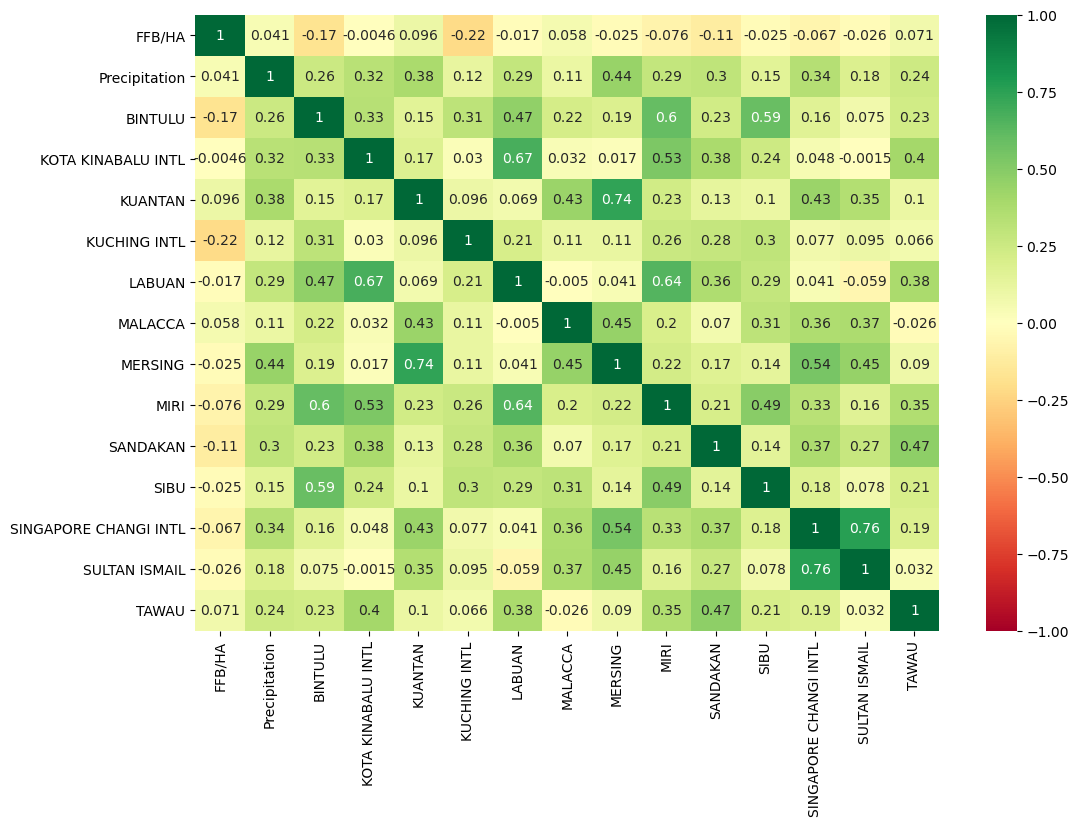

In [36]:
plt.figure(figsize=(12,8))
sns.heatmap(precipitation.corr(),annot=True, cmap = "RdYlGn", vmin=-1, vmax=1)

StatementMeta(devsparkpool, 2201, 38, Finished, Available, Finished)

<AxesSubplot: >

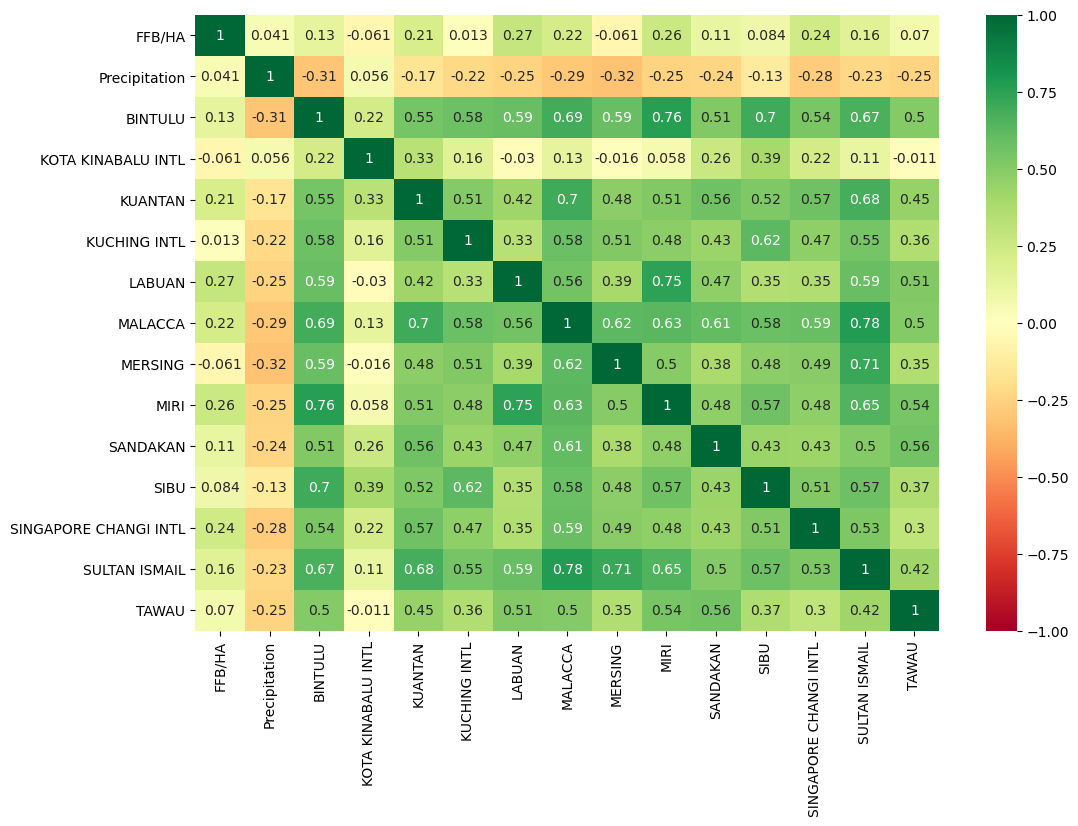

In [37]:
plt.figure(figsize=(12,8))
sns.heatmap(temp_min.corr(),annot=True, cmap = "RdYlGn", vmin=-1, vmax=1)

StatementMeta(devsparkpool, 2201, 39, Finished, Available, Finished)

<AxesSubplot: >

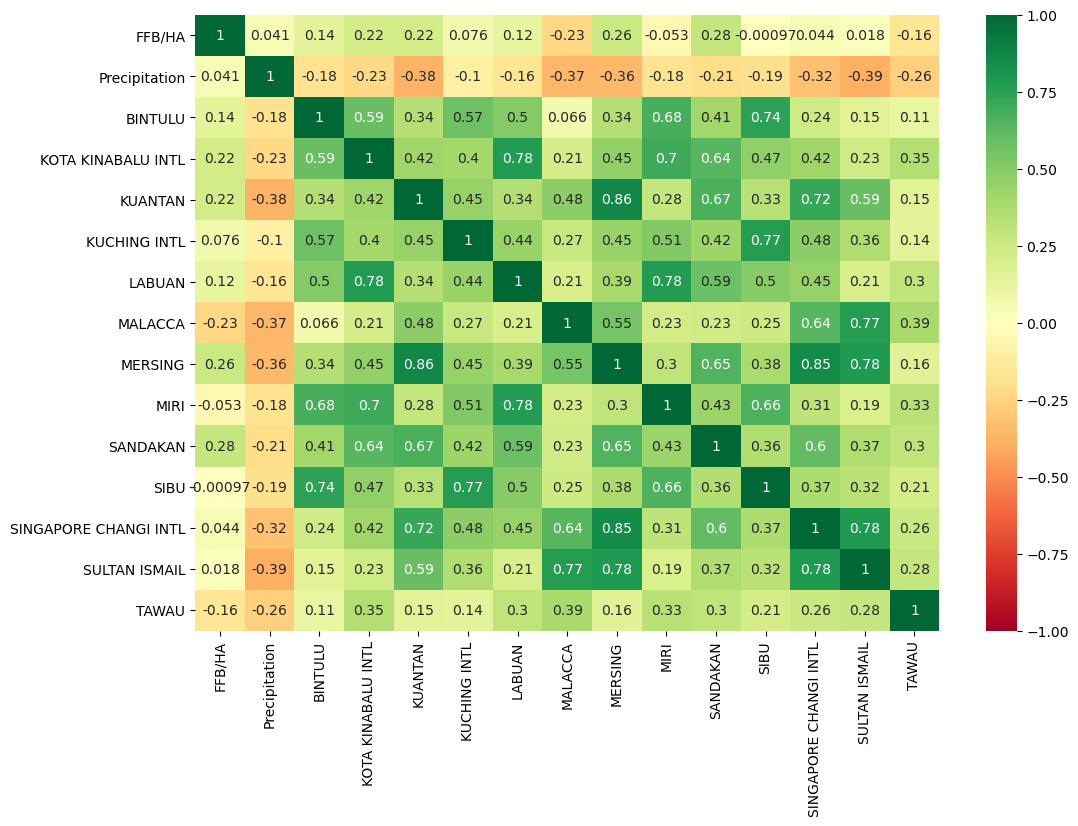

In [38]:
plt.figure(figsize=(12,8))
sns.heatmap(temp_max.corr(),annot=True, cmap = "RdYlGn", vmin=-1, vmax=1)

StatementMeta(devsparkpool, 2201, 40, Finished, Available, Finished)

<AxesSubplot: >

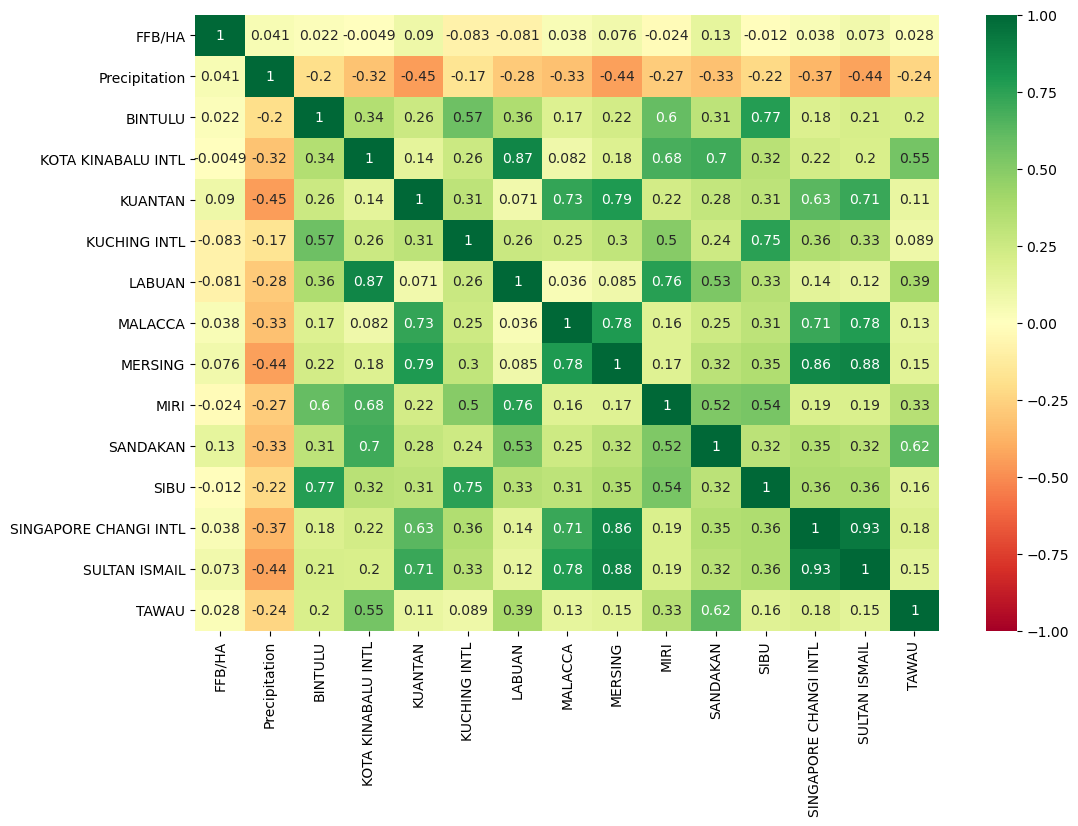

In [39]:
plt.figure(figsize=(12,8))
sns.heatmap(sunshine.corr(),annot=True, cmap = "RdYlGn", vmin=-1, vmax=1)

In [40]:
precipitation.columns

StatementMeta(devsparkpool, 2201, 41, Finished, Available, Finished)

Index(['FFB/HA', 'Precipitation', 'BINTULU', 'KOTA KINABALU INTL', 'KUANTAN',
       'KUCHING INTL', 'LABUAN', 'MALACCA', 'MERSING', 'MIRI', 'SANDAKAN',
       'SIBU', 'SINGAPORE CHANGI INTL', 'SULTAN ISMAIL', 'TAWAU'],
      dtype='object')

##### Precipitation & FFB

StatementMeta(devsparkpool, 2201, 42, Finished, Available, Finished)

<AxesSubplot: >

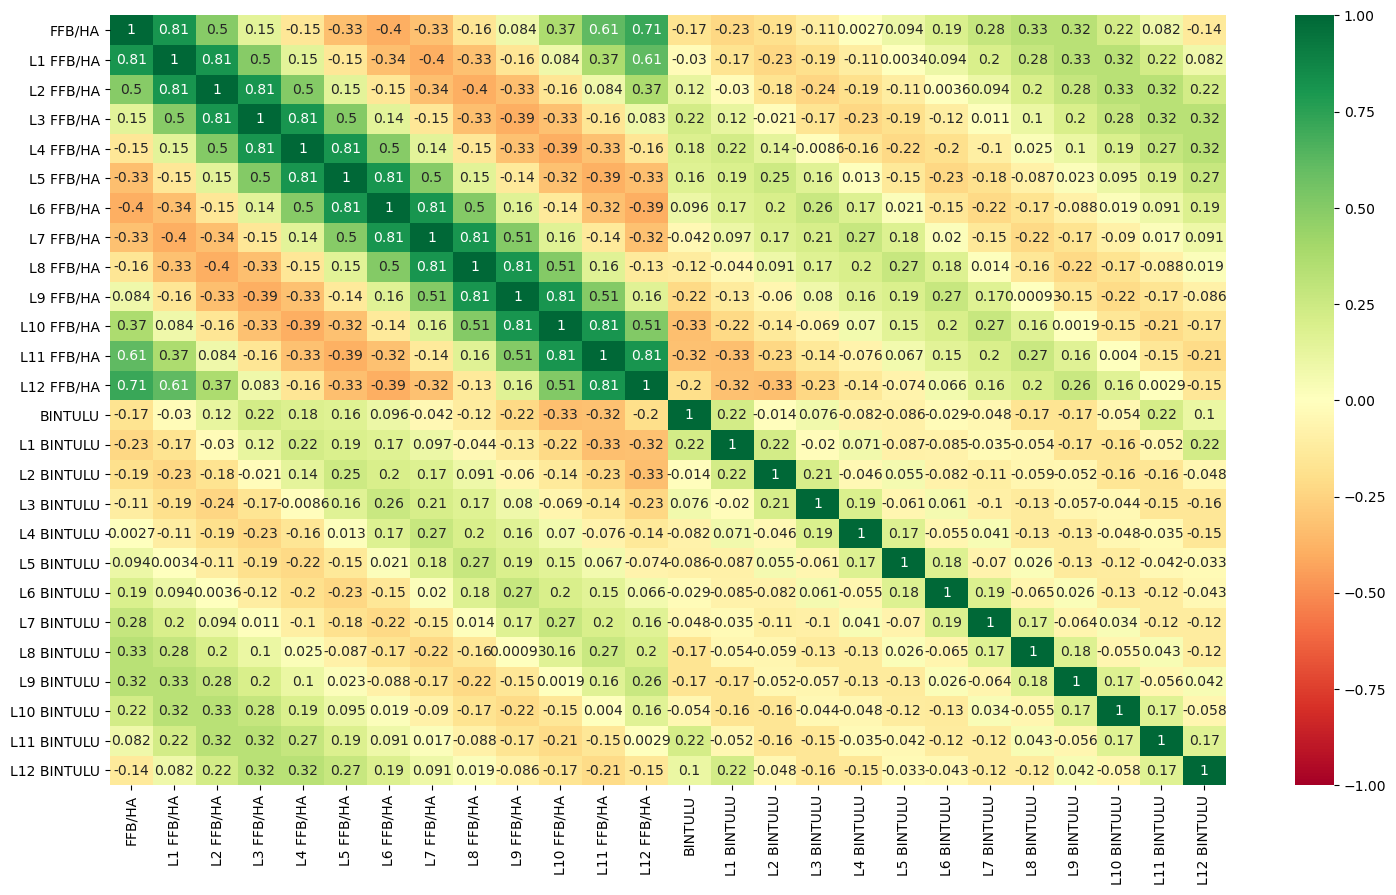

In [41]:
precipitation_lag_1 = precipitation_lag[[
    'FFB/HA', 'L1 FFB/HA', 'L2 FFB/HA', 'L3 FFB/HA', 'L4 FFB/HA', 'L5 FFB/HA', 'L6 FFB/HA', 'L7 FFB/HA', 'L8 FFB/HA', 'L9 FFB/HA', 'L10 FFB/HA', 'L11 FFB/HA', 'L12 FFB/HA',
    'BINTULU', 'L1 BINTULU', 'L2 BINTULU', 'L3 BINTULU', 'L4 BINTULU', 'L5 BINTULU', 'L6 BINTULU', 'L7 BINTULU', 'L8 BINTULU', 'L9 BINTULU', 'L10 BINTULU', 'L11 BINTULU', 'L12 BINTULU'
]]
plt.figure(figsize=(18,10))
sns.heatmap(precipitation_lag_1.corr(), annot=True, cmap = "RdYlGn", vmin=-1, vmax=1)

StatementMeta(devsparkpool, 2201, 43, Finished, Available, Finished)

<AxesSubplot: >

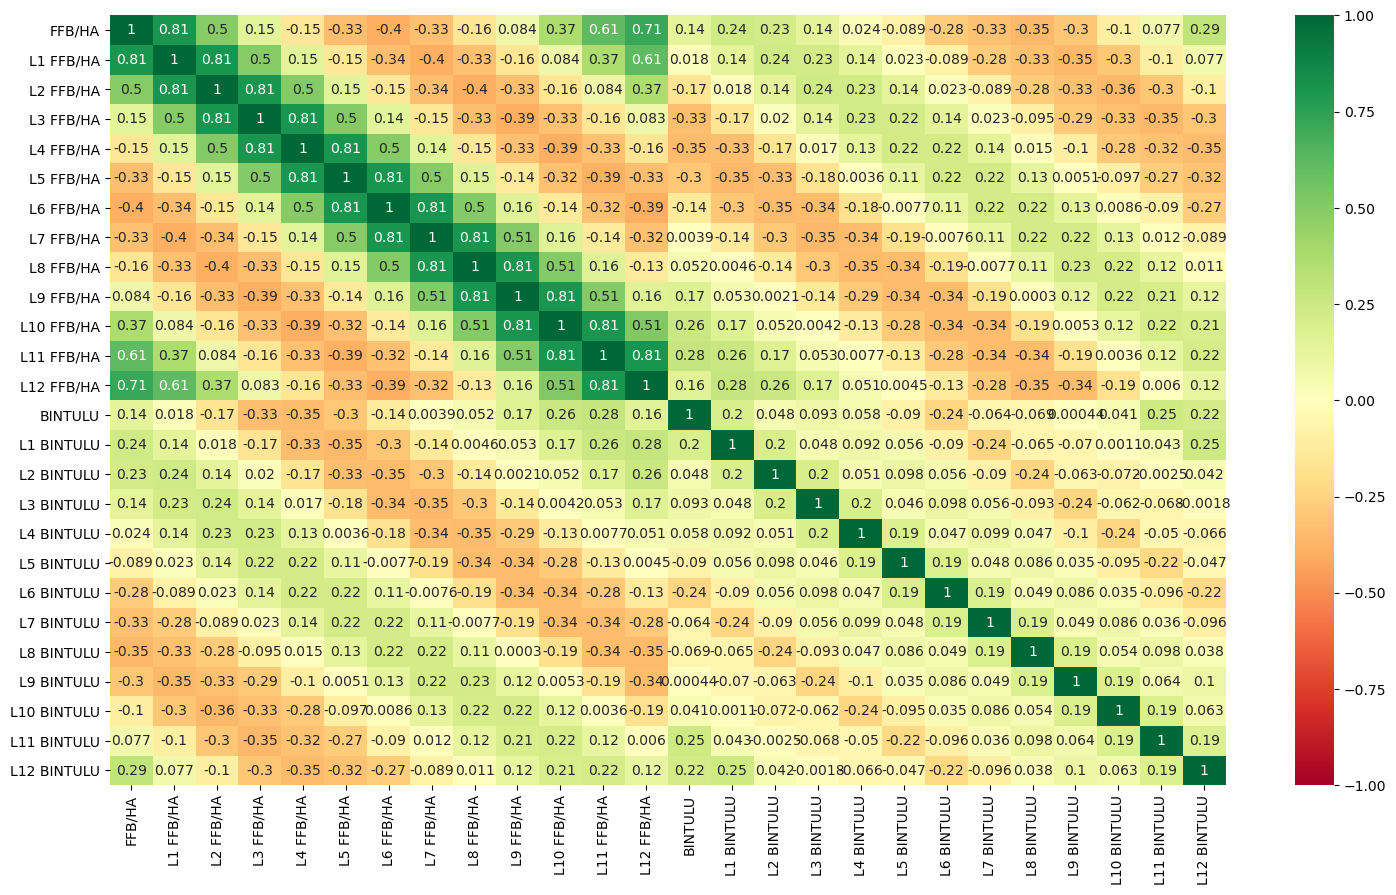

In [42]:
temp_max_lag_1 = temp_max_lag[[
    'FFB/HA', 'L1 FFB/HA', 'L2 FFB/HA', 'L3 FFB/HA', 'L4 FFB/HA', 'L5 FFB/HA', 'L6 FFB/HA', 'L7 FFB/HA', 'L8 FFB/HA', 'L9 FFB/HA', 'L10 FFB/HA', 'L11 FFB/HA', 'L12 FFB/HA',
    'BINTULU', 'L1 BINTULU', 'L2 BINTULU', 'L3 BINTULU', 'L4 BINTULU', 'L5 BINTULU', 'L6 BINTULU', 'L7 BINTULU', 'L8 BINTULU', 'L9 BINTULU', 'L10 BINTULU', 'L11 BINTULU', 'L12 BINTULU'
]]
plt.figure(figsize=(18,10))
sns.heatmap(temp_max_lag_1.corr(), annot=True, cmap = "RdYlGn", vmin=-1, vmax=1)

StatementMeta(devsparkpool, 2201, 44, Finished, Available, Finished)

<AxesSubplot: >

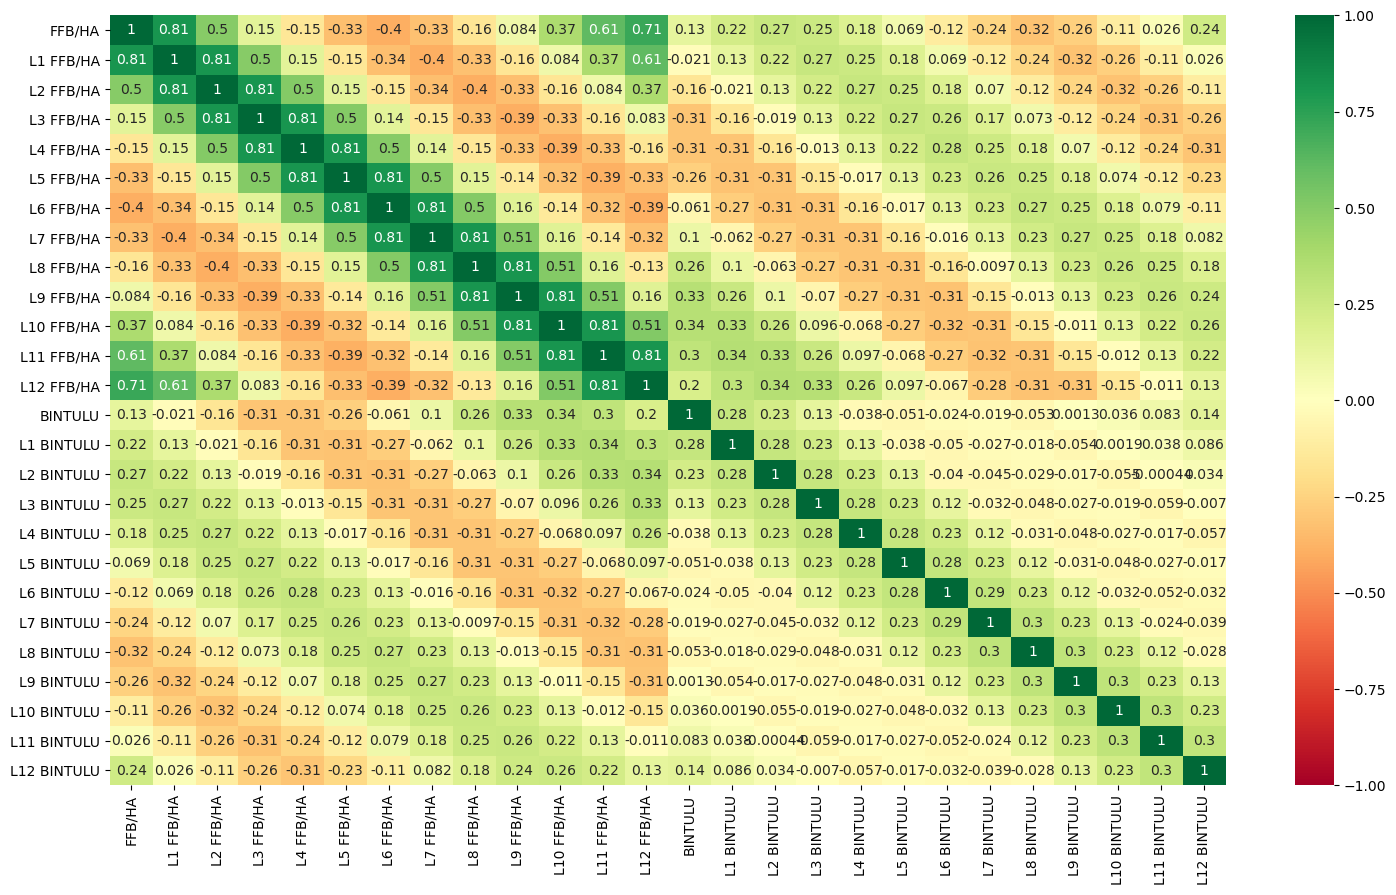

In [43]:
temp_min_lag_1 = temp_min_lag[[
    'FFB/HA', 'L1 FFB/HA', 'L2 FFB/HA', 'L3 FFB/HA', 'L4 FFB/HA', 'L5 FFB/HA', 'L6 FFB/HA', 'L7 FFB/HA', 'L8 FFB/HA', 'L9 FFB/HA', 'L10 FFB/HA', 'L11 FFB/HA', 'L12 FFB/HA',
    'BINTULU', 'L1 BINTULU', 'L2 BINTULU', 'L3 BINTULU', 'L4 BINTULU', 'L5 BINTULU', 'L6 BINTULU', 'L7 BINTULU', 'L8 BINTULU', 'L9 BINTULU', 'L10 BINTULU', 'L11 BINTULU', 'L12 BINTULU'
]]
plt.figure(figsize=(18,10))
sns.heatmap(temp_min_lag_1.corr(), annot=True, cmap = "RdYlGn", vmin=-1, vmax=1)

StatementMeta(devsparkpool, 2201, 45, Finished, Available, Finished)

<AxesSubplot: >

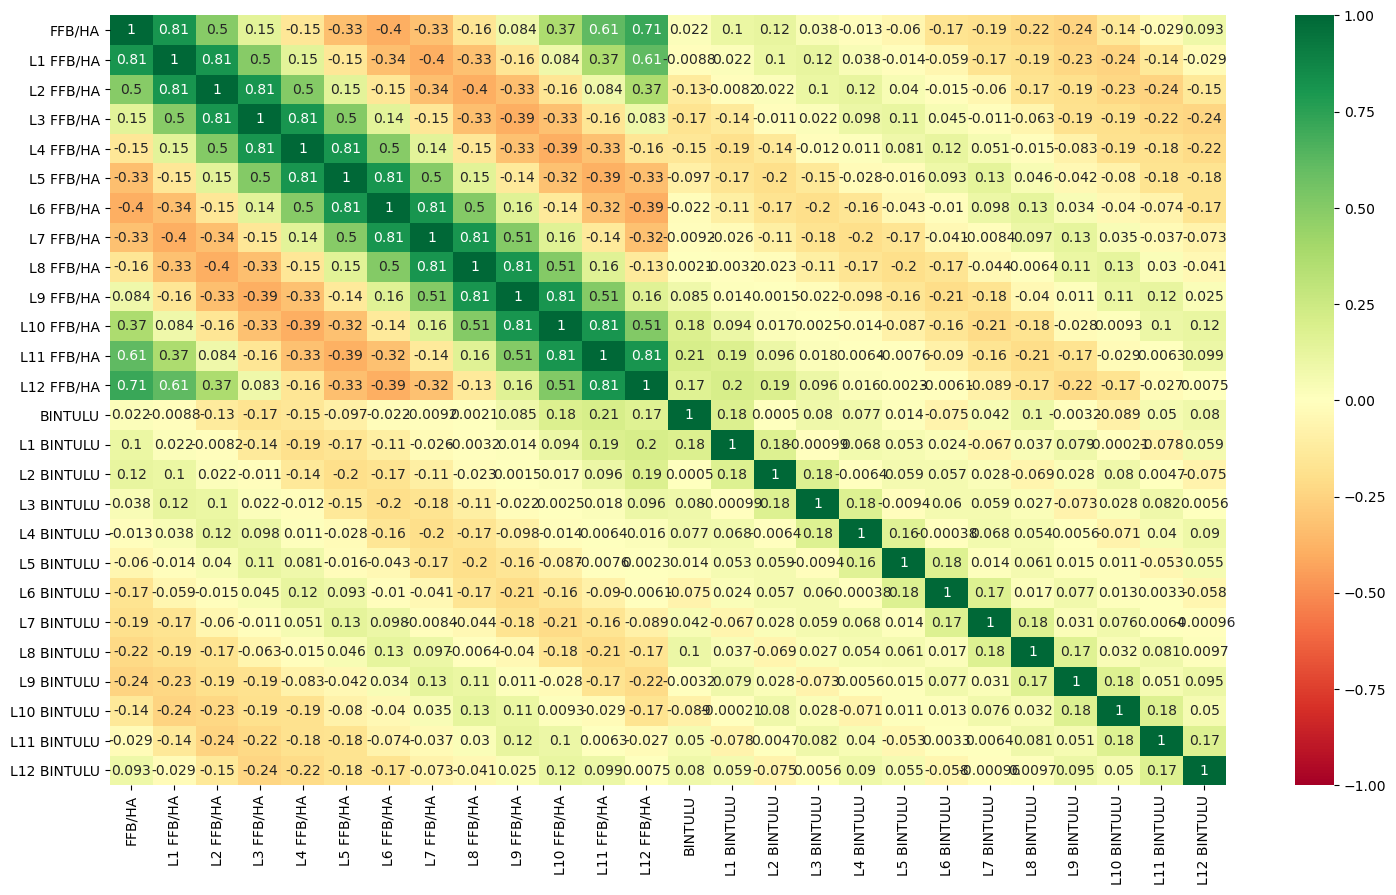

In [44]:
sunshine_lag_1 = sunshine_lag[[
    'FFB/HA', 'L1 FFB/HA', 'L2 FFB/HA', 'L3 FFB/HA', 'L4 FFB/HA', 'L5 FFB/HA', 'L6 FFB/HA', 'L7 FFB/HA', 'L8 FFB/HA', 'L9 FFB/HA', 'L10 FFB/HA', 'L11 FFB/HA', 'L12 FFB/HA',
    'BINTULU', 'L1 BINTULU', 'L2 BINTULU', 'L3 BINTULU', 'L4 BINTULU', 'L5 BINTULU', 'L6 BINTULU', 'L7 BINTULU', 'L8 BINTULU', 'L9 BINTULU', 'L10 BINTULU', 'L11 BINTULU', 'L12 BINTULU'
]]
plt.figure(figsize=(18,10))
sns.heatmap(sunshine_lag_1.corr(), annot=True, cmap = "RdYlGn", vmin=-1, vmax=1)